 # Kovarianz und Korrelation
In diesem Notebook werden wir Kovarianzen und Korrelationen berechnen und praktisch anwenden. Machen Sie sich hierzu - soweit noch nicht geschehen - noch einmal mit den Definitionen aus der Vorlesung vertraut, insbesondere der **Kovarianzmatrix**.


## 1. Vorbereitung
Die folgende Zelle liest eine bivariate Stichprobe aus einer Textdatei ein und plottet die Daten. Führen Sie die Zelle aus.
**Sie müssen den Code in der Zelle nicht ändern!**

X is a dataset with 200 rows and 2 columns.


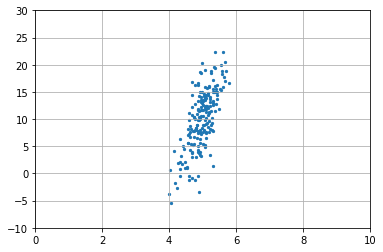

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def read():
    ''' reads a field of numbers from a textfile.'''
    with open('data/sample.txt') as file:
        lines = file.readlines()
    # convert each line from string to sequence of floats. 
    X = list(map(lambda x: [float(t) for t in x.split()], lines))
    X = np.array(X) 
    return X

def plot(X):
    _ = plt.scatter(X[:,0],X[:,1],s=5)
    plt.xlim([0,10]); plt.ylim([-10,30])
    plt.grid(); plt.show()

X = read()
print('X is a dataset with %s rows and %d columns.' %X.shape)
plot(X)

## 2. Kovarianzmatrix schätzen
Notieren Sie auf einem Zettel eine Schätzung für die Einträge der Kovarianzmatrix $\Sigma$ der Stichprobe, basierend auf dem obigen Plot.

<img src="https://c8.alamy.com/comp/2B5DC6H/handwritten-math-calculations-on-a-paper-note-pad-2B5DC6H.jpg" width="300">

## 3. Kovarianzmatrix berechnen
 
Schreiben Sie nun eine ***eigene numpy-Methode*** cov(), die die Kovarianzmatrix $\Sigma$ einer Stichprobe $X$ als Numpy-Array zurückliefert. 

Deckt sich das Ergebnis Ihrer Methode mit Ihrer Schätzung oben?

In [12]:
def cov(X):
    mittelwert_x1 = np.mean(X[:,0])
    mittelwert_x2 = np.mean(X[:,1])
    varianz_x1 = np.var(X[:,0])
    varianz_x2 = np.var(X[:,1])
    sum_x1_x2 = []
    for x,y in zip(X[:,0], X[:,1]):
        sum_ = (x-mittelwert_x1)*(y-mittelwert_x2)
        sum_x1_x2.append(sum_)

    kovarianz = sum(sum_x1_x2) / X.shape[0]

    result = np.array( [[varianz_x1, kovarianz],
                        [kovarianz, varianz_x2]])

    return result;

print(cov(X))

[[ 0.11632517  1.35225522]
 [ 1.35225522 31.13490439]]


In [11]:
# result with numpy methode cov
np.cov(X.T)

array([[ 0.11690972,  1.35905047],
       [ 1.35905047, 31.2913612 ]])

## 3. Korrelation
Schreiben Sie eine weitere Methode *corr()*, die eine ähnliche Matrix wie die Kovarianzmatrix zurückliefert. Die Matrix sollte aber statt den Kovarianzen die **Korrelationen** zwischen den Merkmalen enthalten.

*Hinweis: Verwenden Sie das Ergebnis von cov() als Zwischenergebnis und normalisieren Sie die Einträge zu Korrelationen, indem Sie durch die Standardabweichungen teilen (die zugehörigen Varianzen finden Sie auf der Diagonalen der Kovarianzmatrix).*

In [22]:
import math

def corr(X):
    kovarianzmatrix = cov(X)

    varianz_x1 = kovarianzmatrix[0][0]
    varianz_x2 = kovarianzmatrix[1][1]
    kovarianz = kovarianzmatrix[0][1]

    korrelation = kovarianz / (math.sqrt(varianz_x1) * math.sqrt(varianz_x2))

    return korrelation


print(corr(X))

0.7105555628208012


In [15]:
# check with numpy method
np.corrcoef(X[:,0], X[:,1])

array([[1.        , 0.71055556],
       [0.71055556, 1.        ]])

## 4. Korrelationen auf Ebay-Autos
Der folgende Code liest unsere Ebay-Auto-Daten ein, und filtert sämtliche Autos mit einem Preis von mehr als 100,000 Autos *(diese sind als Ausreißer zu betrachten)*.

Berechnen Sie nun mit Ihrer Methode *corr()* die Korrelationsmatrix. Geben Sie für sämtliche Merkmale die **Korrelation zum Merkmal Preis** (Spalte 0) aus. Welche Merkmale beeinflussen den Preis scheinbar besonders positiv/negativ?

In [32]:
import pandas
cars = pandas.read_csv('data/cars.csv')

# columns = Spalten-Namen
columns = cars.columns

# data = die eigentlichen Daten
data = cars.values.astype('float')
# Wir filtern alle Autos die teurer als 100K EUR sind.
# (man kann's zum Spaß mal ohne diesen Filter probieren)
data = data[data[:,0]<100000,:]

# Korrelationen berechnen
corrs = np.corrcoef(data.T)

# Merkmale und Korrelationen ausgeben.
# FIXME

In [46]:
(corrs[:,0] > 0.3).nonzero()

(array([ 0,  1,  2, 12]),)

In [47]:
(corrs[:,0] < -0.3).nonzero()

(array([ 3, 13]),)